In [1]:
import torch
import torch.nn as nn
import sklearn

In [2]:
device= torch.device('cuda' if torch.cuda.is_available else "cpu")
device

device(type='cuda')

In [3]:
from sklearn.datasets import make_circles
n_samples = 1000
x,y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
len(x), len(y), x[:5], y[:5]

(1000,
 1000,
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [5]:
import pandas as pd
circles = pd.DataFrame({"x1": x[:, 0], "x2": x[:,1], "label": y})
circles.head(10)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

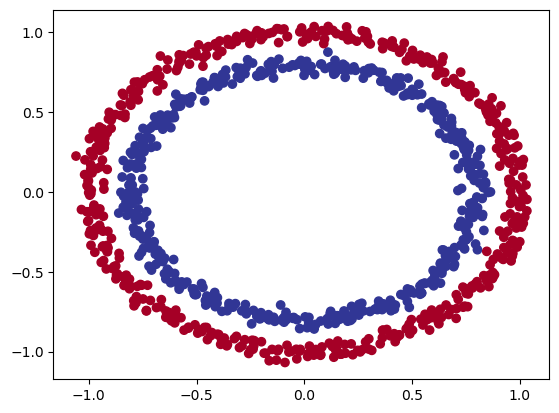

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x=x[:, 0],
            y=x[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.show()


In [8]:
x.shape, y.shape

((1000, 2), (1000,))

In [9]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [10]:
x_sample = x[0]
y_sample = y[0]
x_sample,x_sample.shape,y_sample, y_sample.shape

(array([0.75424625, 0.23148074]), (2,), np.int64(1), ())

In [11]:
import numpy as np
type(x), x.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
x  = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
x.dtype, y.dtype

(torch.float32, torch.float32)

In [13]:
x[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
torch.manual_seed(42)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
len(x_train), len(x_test), len(y_train), len(y_test), n_samples

(800, 200, 800, 200, 1000)

In [17]:
x_train.shape

torch.Size([800, 2])

In [18]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(in_features=2, out_features=5)
        self.l2 = nn.Linear(in_features=5, out_features=1)

       

    def forward(self, x):
        return self.l2(self.l1(x))


In [19]:
model = CircleModelV0().to(device)
model, device

(CircleModelV0(
   (l1): Linear(in_features=2, out_features=5, bias=True)
   (l2): Linear(in_features=5, out_features=1, bias=True)
 ),
 device(type='cuda'))

In [20]:
next(model.parameters()).device

device(type='cuda', index=0)

In [21]:
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
next(model.parameters()).device

device(type='cuda', index=0)

In [23]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [24]:
with torch.inference_mode():
    untrained_preds = model(x_test.to(device))
print(f"Length of predictions : {len(untrained_preds)}, Shapet : {untrained_preds.shape}")
print(f"Length of test samples : {len(x_test)}, Shapet : {x_test.shape}")
print(f"First 10 predictions : {torch.round(untrained_preds[:10])}")
print(f"First 10t labels: {y_test[:10]}")

Length of predictions : 200, Shapet : torch.Size([200, 1])
Length of test samples : 200, Shapet : torch.Size([200, 2])
First 10 predictions : tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')
First 10t labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [25]:
y_test[:10], x_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]))

In [26]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

In [27]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [28]:
#calculate accurcacy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [29]:
model.eval()
with torch.inference_mode():
    y_logits = model(x_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [30]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

10.20t hours

In [31]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [32]:
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model(x_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epoches = 200
x_train, y_train = x_train.to(device), y_train.to(device) 
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epoches):
    model.train()
    y_logits = model(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # loss = loss_fn(torch.sigmoid(y_logits)) #nn.BCELoss expects prediction probabilities as input
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred= test_pred)
    if epoch%10==0:
        print(f"Epoch : {epoch} | Loss : {loss:.5f} | Acc : {acc:.2f}% | Test loss : {test_loss:.5f} | Test Acc : {test_acc:.2f}%")



Epoch : 0 | Loss : 0.69796 | Acc : 51.88% | Test loss : 0.69460 | Test Acc : 57.50%
Epoch : 10 | Loss : 0.69768 | Acc : 52.00% | Test loss : 0.69438 | Test Acc : 58.00%
Epoch : 20 | Loss : 0.69742 | Acc : 52.00% | Test loss : 0.69418 | Test Acc : 57.50%
Epoch : 30 | Loss : 0.69717 | Acc : 52.00% | Test loss : 0.69401 | Test Acc : 56.50%
Epoch : 40 | Loss : 0.69695 | Acc : 51.62% | Test loss : 0.69385 | Test Acc : 56.50%
Epoch : 50 | Loss : 0.69675 | Acc : 51.38% | Test loss : 0.69370 | Test Acc : 56.00%
Epoch : 60 | Loss : 0.69656 | Acc : 51.38% | Test loss : 0.69357 | Test Acc : 56.00%
Epoch : 70 | Loss : 0.69638 | Acc : 51.38% | Test loss : 0.69345 | Test Acc : 56.50%
Epoch : 80 | Loss : 0.69621 | Acc : 51.25% | Test loss : 0.69334 | Test Acc : 56.50%
Epoch : 90 | Loss : 0.69606 | Acc : 51.38% | Test loss : 0.69324 | Test Acc : 55.00%
Epoch : 100 | Loss : 0.69592 | Acc : 51.12% | Test loss : 0.69315 | Test Acc : 54.00%
Epoch : 110 | Loss : 0.69579 | Acc : 51.00% | Test loss : 0.69306

In [34]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Download the helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


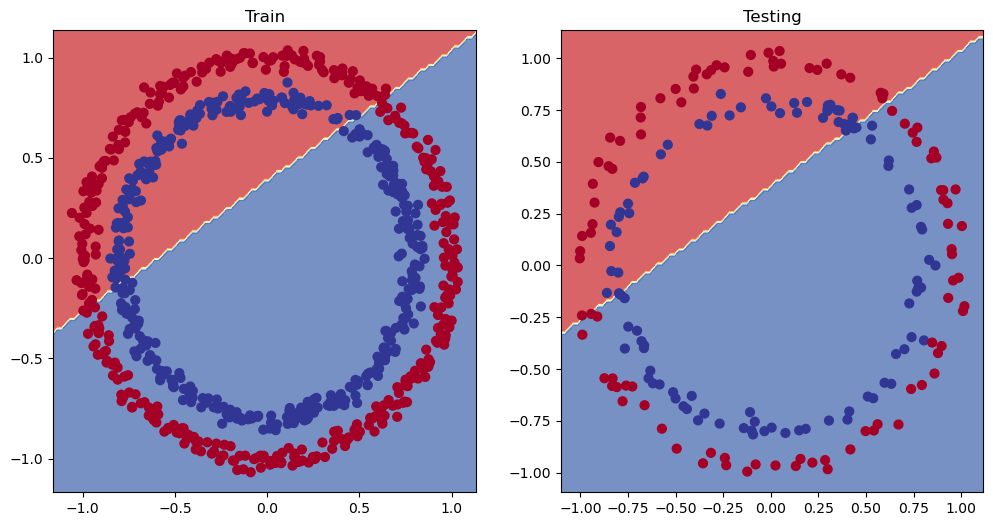

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, x_train, y_train)

plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model, x_test, y_test)

In [36]:
print(torch.cuda.memory_summary())


|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  16680 KiB |  17722 KiB | 444779 KiB | 428099 KiB |
|       from large pool |  16640 KiB |  16640 KiB |  16640 KiB |      0 KiB |
|       from small pool |     40 KiB |   1082 KiB | 428139 KiB | 428099 KiB |
|---------------------------------------------------------------------------|
| Active memory         |  16680 KiB |  17722 KiB | 444779 KiB | 428099 KiB |
|       from large pool |  16640 KiB |  16640 KiB |  16640 KiB |

In [37]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0842, -0.2840],
                      [ 0.4637, -0.5447],
                      [-0.3267, -0.1979],
                      [-0.4230,  0.0615],
                      [-0.7005,  0.6438]])),
             ('0.bias', tensor([-0.6038,  0.5324,  0.1158, -0.2243,  0.4318])),
             ('1.weight',
              tensor([[ 0.0837,  0.3099,  0.0414, -0.1225,  0.1399]])),
             ('1.bias', tensor([-0.1615]))])

In [38]:
# x_train[:5], y_train[:5]

In [39]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    def forward(self, x):
        x1 = self.layer_1(x)
        x2 = self.layer_2(x1)
        x3 = self.layer_3(x2)
        return x3
        # return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0842, -0.2840],
                      [ 0.4637, -0.5447],
                      [-0.3267, -0.1979],
                      [-0.4230,  0.0615],
                      [-0.7005,  0.6438]])),
             ('0.bias', tensor([-0.6038,  0.5324,  0.1158, -0.2243,  0.4318])),
             ('1.weight',
              tensor([[ 0.0837,  0.3099,  0.0414, -0.1225,  0.1399]])),
             ('1.bias', tensor([-0.1615]))])

In [41]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [42]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                             lr=1e-4)

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epoches=1000

x_train, y_train, x_test, y_test = x_train.to(device), y_train.to(device), x_test.to(device), y_test.to(device)

for epoch in range(epoches):
    model_1.train()
    y_logits = model_1(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss_train = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred= y_pred)
    
    optimizer.zero_grad()

    loss_train.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        loss_test = loss_fn(test_logits, 
                            y_test)
        acc_test = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    if epoch%100==0:
        print(f"Epoch : {epoch} | Train Loss : {test_loss:.5f}, Acc : {acc:.2f}% | Test Loss : {loss_test:.5f}, Acc : {acc_test:.2f}%")

Epoch : 0 | Train Loss : 0.69259, Acc : 50.88% | Test Loss : 0.69261, Acc : 51.00%
Epoch : 100 | Train Loss : 0.69259, Acc : 50.88% | Test Loss : 0.69261, Acc : 51.00%
Epoch : 200 | Train Loss : 0.69259, Acc : 50.88% | Test Loss : 0.69261, Acc : 51.00%
Epoch : 300 | Train Loss : 0.69259, Acc : 50.88% | Test Loss : 0.69261, Acc : 51.00%
Epoch : 400 | Train Loss : 0.69259, Acc : 50.88% | Test Loss : 0.69261, Acc : 51.00%
Epoch : 500 | Train Loss : 0.69259, Acc : 50.88% | Test Loss : 0.69261, Acc : 51.00%
Epoch : 600 | Train Loss : 0.69259, Acc : 50.88% | Test Loss : 0.69261, Acc : 51.00%
Epoch : 700 | Train Loss : 0.69259, Acc : 50.88% | Test Loss : 0.69261, Acc : 51.00%
Epoch : 800 | Train Loss : 0.69259, Acc : 50.88% | Test Loss : 0.69261, Acc : 51.00%
Epoch : 900 | Train Loss : 0.69259, Acc : 50.88% | Test Loss : 0.69261, Acc : 51.00%


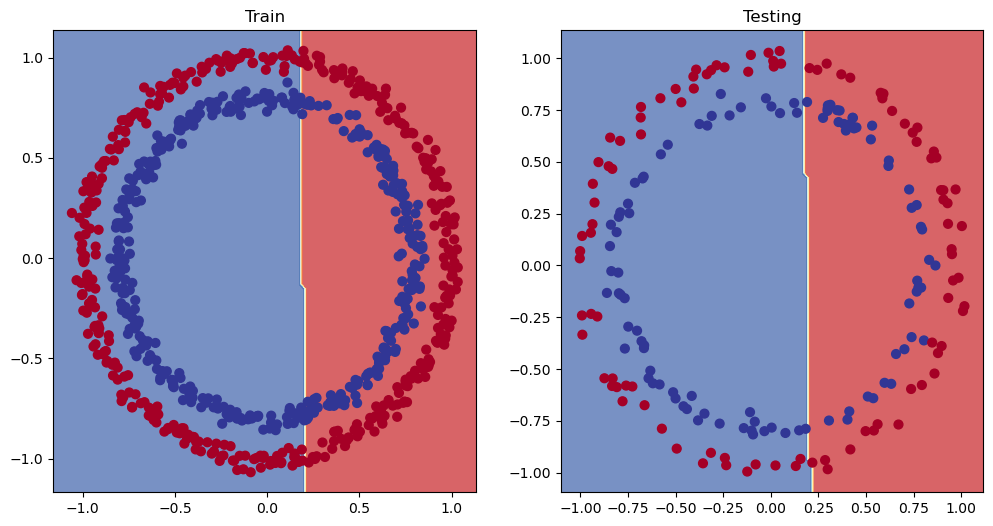

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train)

plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_1, x_test, y_test)

11.27 hours

Straight line model

In [45]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
x_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = x_regression*weight + bias
print(len(x_regression))
x_regression[:5], y_regression[:5], len(y_regression)

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]),
 100)

In [63]:
train_split = int(0.8 * len(x_regression))
x_train_regression, y_train_regression = x_regression[:train_split], y_regression[:train_split]
x_test_regression, y_test_regression = x_regression[train_split:], y_regression[train_split:]
len(x_train_regression), len(y_train_regression), len(x_test_regression), len(y_test_regression)

(80, 80, 20, 20)

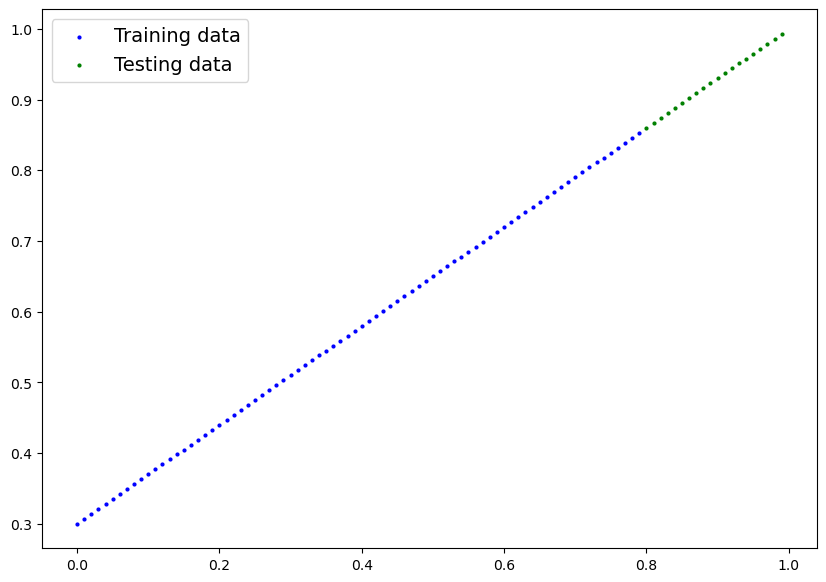

In [47]:
plot_predictions(train_data=x_train_regression,
                 train_labels=y_train_regression,
                 test_data=x_test_regression,
                 test_labels=y_test_regression)

11.35 hours

In [48]:
x_train_regression[:5], y_train_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [49]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [50]:
#Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [51]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=1e-3)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [62]:
epoches =1000
x_train_regression, y_train_regression, x_test_regression, y_test_regression = x_train_regression.to(device), y_train_regression.to(device), x_test_regression.to(device), y_test_regression.to(device)

y_pred = model_2(x_train_regression)
# loss = loss_fn(y_pred, y_train_regression)
y_pred.shape, y_train_regression.shape, x_train_regression.shape

# for epoch in range(epoches):
#     model_2.train()

#     y_pred = model_2(x_train_regression)
#     loss = loss_fn(y_pred, y_train_regression)

#     optimizer.zero_grad()

#     loss.backward()

#     optimizer.step()

#     model_2.eval()

#     with torch.inference_mode():
#         test_pred = model_2(x_test_regression)
#         test_loss = loss_fn(test_pred, y_test_regression) 

#     if epoch%100==0:
#         print(f"Epoch : {epoch} | Train Loss : {loss:.5f}| Test Loss : {test_loss:.5f}")
    

(torch.Size([20, 1]), torch.Size([80, 1]), torch.Size([20, 1]))

11.44 hours

In [ ]:
epoches=100
for epoch in range(epoches):
    model.train()
    y_pred_train = model(x_train.to(device))
    loss_train = loss_fn(y_pred_train.to(device), y_train.to(device))
    optimizer.zero_grad()

    loss_train.backward()

    model.eval()
    with torch.inference_mode():
        y_pred_test = model(x_test.to(device))
        loss_test = loss_fn(y_pred_test, y_test)
    
    if epoch%10==0:
        print(f"Epoch : {epoch} | Train loss : {loss_train} | Test Loss : {loss_test}")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)